# Лабораторна робота №3. Дослiдження варiантiв архiтектур згроткових нейронних мереж

**Виконала** студентка групи КІ-51мп Додонова Марія

**Мета:** Вивчити та реалiзувати вiдомi архiтектури згорткових нейронних мереж (VGGNet, ResNet, Inception), провести їх порiвняльний аналiз мiж собою та з простою моделлю, реалiзованою в попереднiй лабораторнiй роботi.

## Порядок виконання

1. Обрати фреймворк для виконання роботи: `tensorflow` чи `pytorch`.

2. Взяти задачу i вiдповiдний датасет (Fashion MNIST, CIFAR-10 або CIFAR-100) з лабораторної роботи No2. Використовуйте той самий розподiл на тренувальну, валiдацiйну та тестову вибiрки для коректного порiвняння результатiв.

3. Реалiзувати "з нуля" 2 вiдомi архiтектури з наведеного списку. "З нуля" означає самостiйну побудову моделi з використанням готових шарiв (Conv2d, MaxPool2d, BatchNorm, etc.) з вiдповiдних бiблiотек.
* VGGNet (наприклад, VGG16);
* Inception (наприклад, GoogLeNet / Inception v1);
* ResNet (наприклад, ResNet18 або ResNet34);
* Будь-яку iншу сучасну архiтектуру за [даним посиланням](https://huggingface.co/papers/trending).

4. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU. Якщо у вас немає CUDA-сумiсної вiдеокарти, використовуйте [Google Colab](https://colab.research.google.com/).

5. Для кожної моделi побудувати графiки навчання (loss та точнiсть) на тренувальнiй та валiдацiйнiй вибiрках.

6. Проаналiзувати отриманi результати. Виконати порiвняння точностi, швидкостi збiжностi та кiлькостi параметрiв реалiзованих моделей мiж собою та з простою моделлю з лабораторної роботи No2. Зробити детальнi висновки.

## Виконання роботи

### 1. Обрати фреймворк для виконання роботи: `tensorflow` чи `pytorch`.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

from src.models.vggnet import VGG13
from src.models.resnet import ResNet18
from src.trainer import Trainer
from src.plot_tools import plot_history

DATA_PATH = "data"
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_EPOCHS = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001

print(f"Using device: {DEVICE}")

Using device: cuda


### 2. Взяти задачу i вiдповiдний датасет (Fashion MNIST, CIFAR-10 або CIFAR-100) з лабораторної роботи No2. Використовуйте той самий розподiл на тренувальну, валiдацiйну та тестову вибiрки для коректного порiвняння результатiв.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2470, 0.2435, 0.2616)
    )
])

# Load train and test splits
train_dataset = datasets.CIFAR10(
    root=DATA_PATH,
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.CIFAR10(
    root=DATA_PATH,
    train=False,
    download=True,
    transform=transform
)

# Split train into train and validation
train_dataset, val_dataset = random_split(train_dataset, [0.8, 0.2])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, pin_memory=True)

### 3. Реалiзувати "з нуля" 2 вiдомi архiтектури з наведеного списку. "З нуля" означає самостiйну побудову моделi з використанням готових шарiв (Conv2d, MaxPool2d, BatchNorm, etc.) з вiдповiдних бiблiотек.
* VGGNet (наприклад, VGG16);
* Inception (наприклад, GoogLeNet / Inception v1);
* ResNet (наприклад, ResNet18 або ResNet34);
* Будь-яку iншу сучасну архiтектуру за [даним посиланням](https://huggingface.co/papers/trending).

### 4. Навчити побудованi мережi на завантаженому датасетi. Дуже рекомендується навчати моделi на GPU. Якщо у вас немає CUDA-сумiсної вiдеокарти, використовуйте [Google Colab](https://colab.research.google.com/).

In [3]:
criterion = nn.CrossEntropyLoss()

print("Training VGG13:")
vgg_model = VGG13(in_channels=3, num_classes=10)
vgg_optimizer = optim.Adam(vgg_model.parameters(), lr=LEARNING_RATE)
vgg_trainer = Trainer(vgg_model, vgg_optimizer, criterion, device=DEVICE)
vgg_history = vgg_trainer.train(NUM_EPOCHS, train_loader, val_loader)
print("Test results:", end=" ")
vgg_trainer.test(test_loader)

print("\nTraining ResNet18:")
resnet_model = ResNet18(in_channels=3, num_classes=10)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=LEARNING_RATE)
resnet_trainer = Trainer(resnet_model, resnet_optimizer, criterion, device=DEVICE)
resnet_history = resnet_trainer.train(NUM_EPOCHS, train_loader, val_loader)
print("Test results:", end=" ")
resnet_trainer.test(test_loader)

print("\nFinished Training!")

Training VGG13:
Epoch [ 1/10]: Train Loss: 1.9378, Val Loss: 1.6969, Train Accuracy: 0.2247, Val Accuracy: 0.3397.
Epoch [ 2/10]: Train Loss: 1.5498, Val Loss: 1.3395, Train Accuracy: 0.3929, Val Accuracy: 0.5024.
Epoch [ 3/10]: Train Loss: 1.2231, Val Loss: 1.0912, Train Accuracy: 0.5528, Val Accuracy: 0.6086.
Epoch [ 4/10]: Train Loss: 1.0045, Val Loss: 0.9466, Train Accuracy: 0.6462, Val Accuracy: 0.6688.
Epoch [ 5/10]: Train Loss: 0.8643, Val Loss: 0.9012, Train Accuracy: 0.6984, Val Accuracy: 0.6888.
Epoch [ 6/10]: Train Loss: 0.7478, Val Loss: 0.7962, Train Accuracy: 0.7429, Val Accuracy: 0.7241.
Epoch [ 7/10]: Train Loss: 0.6594, Val Loss: 0.8114, Train Accuracy: 0.7739, Val Accuracy: 0.7340.
Epoch [ 8/10]: Train Loss: 0.5767, Val Loss: 0.8110, Train Accuracy: 0.8031, Val Accuracy: 0.7400.
Epoch [ 9/10]: Train Loss: 0.5122, Val Loss: 0.8019, Train Accuracy: 0.8266, Val Accuracy: 0.7453.
Epoch [10/10]: Train Loss: 0.4656, Val Loss: 0.8240, Train Accuracy: 0.8414, Val Accuracy: 0.

### 5. Для кожної моделi побудувати графiки навчання (loss та точнiсть) на тренувальнiй та валiдацiйнiй вибiрках.


VGG13 Curves


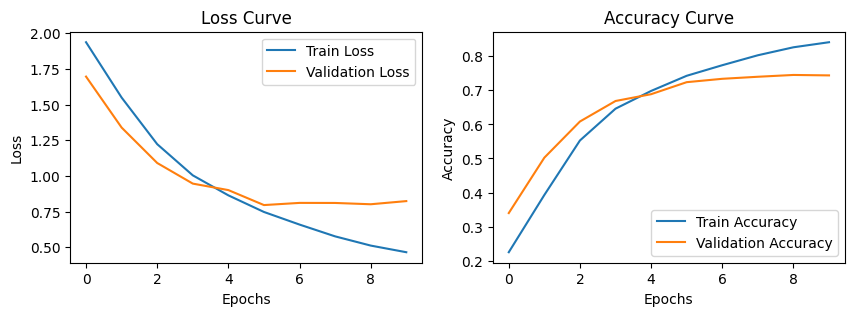


ResNet18 Curves


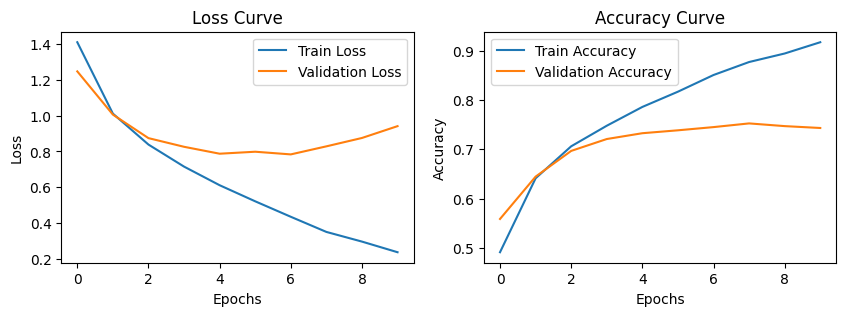

In [4]:
print("VGG13 Curves")
plot_history(vgg_history)

print("\nResNet18 Curves")
plot_history(resnet_history)

### 6. Проаналiзувати отриманi результати. Виконати порiвняння точностi, швидкостi збiжностi та кiлькостi параметрiв реалiзованих моделей мiж собою та з простою моделлю з лабораторної роботи No2. Зробити детальнi висновки.

Порівнюючи графіки навчання мереж VGG13 та ResNet18 можна помітити, що обом мережам характерне перенавчання, причому ResNet18 перенавчається швидше, що пояснюється застосуванням заскладих архітектур для простого набору даних (ResNet18 має складнішу архітектуру, ніж VGG13, тому перенавчається швидше). В зв'язку з цим VGG13 має кращий результат на тестовому наборі даних. В архітектури мереж додано шари Dropout, що помітно зменшило ефект перенавчання.

ResNet18 має швидшу збіжність та більшу кількість параметрів, ніж VGG13. LeNet5, використана у попередній лабораторній роботі, демонструє гіршу точність і швидкість збіжності, але має набагато меншу кількість параметрів.

## Висновок

В ході виконання роботи було завантажено, передоброблено та розділено датасет FashionMNIST на тренувальну, валідаційну та тестову вибірки, реалізовано архітектури згорткових нейронних мереж VGG13 та ResNet18. Було навчено мережі на завантаженому датасеті з використанням різних гіперпараметрів та побудовано графіки навчання мереж.

VGG13 демонструє найкращі та найбільш оптимальні з точки зору швидкості збіжності, кількості параметрів і точності результати для обраного набору данох CIFAR-10.